# Mobile Device Usage Case Study

> Add blockquote


### Data Extraction and Cleaning  
This project analyzes mobile device usage based on the *User Behavior Dataset*.  

**Business Task:**  
Understand how mobile users interact with their devices and prepare the dataset for analysis.

**Dataset Source:**  
Gigsheet – Mobile Device Usage and User Behavior Dataset.

In this notebook, we will:  
1. Import dependencies  
2. Load the dataset  
3. Inspect the structure  
4. Clean invalid or missing data  
5. Prepare the dataset for deeper analysis


In [ ]:
# Import core libraries
import pandas as pd
import numpy as np

# Display settings
pd.set_option('display.max_columns', None)


## Loading the Dataset  
The CSV file is stored in the `sample_data` folder in this Colab environment.  
We read the dataset into a dataframe called `device_usage`.


In [ ]:
# Load dataset
file_path = "/content/sample_data/user_behavior_dataset.csv"
device_usage = pd.read_csv(file_path)

# Preview the dataset
device_usage.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


## Inspecting the Dataset  
We now check:  
- First few rows  
- Column names  
- Data types  
- Shape of the dataset


In [ ]:
print("First 6 rows:")
display(device_usage.head())

print("\nColumn names:")
print(device_usage.columns.tolist())

print("\nData types:")
print(device_usage.dtypes)

print("\nDataset shape:")
print(device_usage.shape)


First 6 rows:


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3



Column names:
['User ID', 'Device Model', 'Operating System', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class']

Data types:
User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

Dataset shape:
(700, 11)


## Checking for Duplicates, Typos, and Invalid Values  
We ensure the dataset has no:  
- Duplicate users  
- Typos in categorical fields  
- Impossible numeric values  


In [ ]:
duplicate_count = device_usage["User ID"].duplicated().sum()
print("Number of duplicate User IDs:", duplicate_count)


Number of duplicate User IDs: 0


In [ ]:
print("\nDevice Model counts:")
print(device_usage["Device Model"].value_counts())

print("\nOperating System counts:")
print(device_usage["Operating System"].value_counts())

print("\nGender counts:")
print(device_usage["Gender"].value_counts())



Device Model counts:
Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

Operating System counts:
Operating System
Android    554
iOS        146
Name: count, dtype: int64

Gender counts:
Gender
Male      364
Female    336
Name: count, dtype: int64


In [ ]:
numeric_columns = [
    "App Usage Time (min/day)",
    "Screen On Time (hours/day)",
    "Battery Drain (mAh/day)",
    "Number of Apps Installed",
    "Data Usage (MB/day)",
    "Age",
    "User Behavior Class"
]

# 1. Values must be non-negative
for col in numeric_columns:
    invalid_negative = device_usage[device_usage[col] < 0]
    print(f"Negative values in '{col}':", len(invalid_negative))


# 2. User Behavior Class must be whole numbers 1–5
invalid_behavior = device_usage[
    (device_usage["User Behavior Class"] < 1) |
    (device_usage["User Behavior Class"] > 5) |
    (device_usage["User Behavior Class"] % 1 != 0)
]
print("\nInvalid User Behavior Class values:", len(invalid_behavior))


# 3. App Usage Time must not exceed 24 * 60 minutes
invalid_app_usage = device_usage[
    device_usage["App Usage Time (min/day)"] > 1440
]
print("Invalid App Usage Time (> 1440 min/day):", len(invalid_app_usage))


# 4. Screen On Time must not exceed 24 hours
invalid_screen_time = device_usage[
    device_usage["Screen On Time (hours/day)"] > 24
]
print("Invalid Screen On Time (> 24 hours):", len(invalid_screen_time))



Negative values in 'App Usage Time (min/day)': 0
Negative values in 'Screen On Time (hours/day)': 0
Negative values in 'Battery Drain (mAh/day)': 0
Negative values in 'Number of Apps Installed': 0
Negative values in 'Data Usage (MB/day)': 0
Negative values in 'Age': 0
Negative values in 'User Behavior Class': 0

Invalid User Behavior Class values: 0
Invalid App Usage Time (> 1440 min/day): 0
Invalid Screen On Time (> 24 hours): 0


## Cleaning the Dataset  
We remove:  
- Null values  
- Out-of-range age values  
- Negative or impossible data points  


In [ ]:
print("Missing values before cleaning:")
print(device_usage.isna().sum())

# remove rows with missing values
device_usage = device_usage.dropna()

print("\nMissing values after cleaning:")
print(device_usage.isna().sum())


Missing values before cleaning:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Missing values after cleaning:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


# Final Cleaned Dataset  
The dataframe is now cleaned and ready for analysis.  
Below is the shape and preview of the final dataset.


In [ ]:
print("Final dataset shape:", device_usage.shape)
device_usage.head()


Final dataset shape: (700, 11)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# EDA SECTION

In [ ]:
# -------------------------------------------------------------
# EDA SECTION for Demographic Patterns and Device & OS Behavior
# -------------------------------------------------------------

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook aesthetics
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8")

## A. DEMOGRAPHIC PATTERNS


###  Insight: Age Distribution of Users
The dataset contains users from a wide age range, with a strong concentration between ages 18 and 40.  
This indicates that the dataset is primarily composed of younger and working-age individuals, which may influence overall usage patterns.  
The distribution appears fairly uniform within this range, with fewer users beyond age 60.


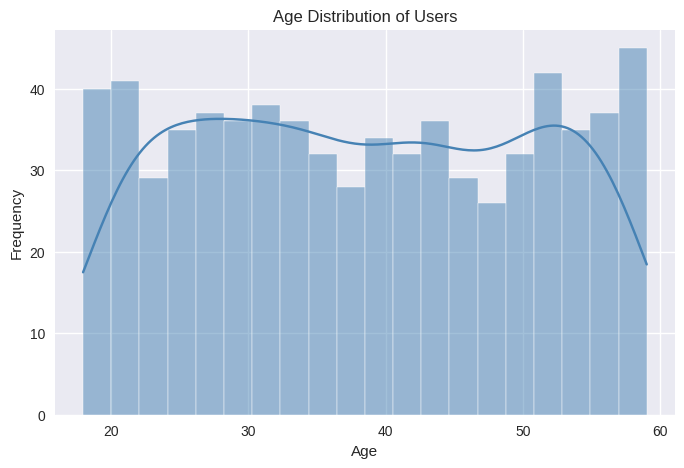

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(device_usage["Age"], bins=20, kde=True, color="steelblue")
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Insight: Gender Distribution
The gender split is nearly balanced, with a slight male majority.  
This balance ensures that comparisons between male and female usage patterns will not be heavily biased by sample size.

/tmp/ipython-input-2767064443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=device_usage, palette="Set2")


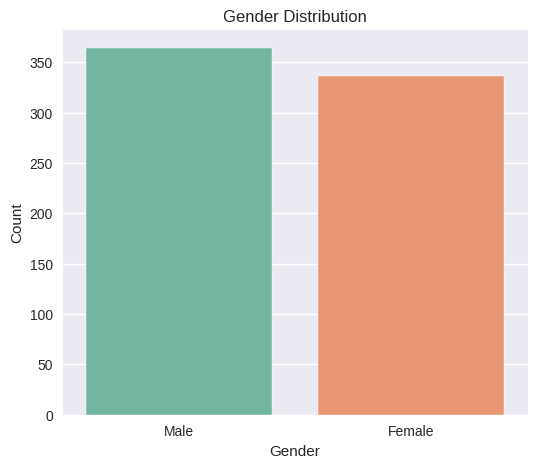

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="Gender", data=device_usage, palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### Insight: Age vs. Screen-On Time


There is a clear downward trend in screen time as age increases.  
Younger users (teens and early 20s) tend to spend significantly more hours per day on their devices.  
Screen time steadily decreases for users above age 40.  
This suggests that younger demographics contribute more heavily to intensive device usage and may drive high battery drain and data consumption behaviors.

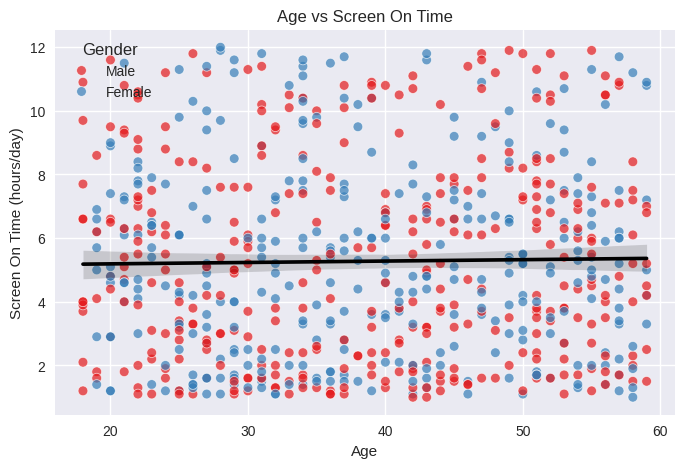

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Age",
    y="Screen On Time (hours/day)",
    data=device_usage,
    hue="Gender",
    palette="Set1",
    alpha=0.7
)
sns.regplot(
    x="Age",
    y="Screen On Time (hours/day)",
    data=device_usage,
    scatter=False,
    color="black"
)
plt.title("Age vs Screen On Time")
plt.xlabel("Age")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

### Insight: Screen-On Time by Gender
Both genders show similar variability in screen-on time, but the median usage is slightly higher among females.  
This suggests that gender does not dramatically impact screen-on behavior, although small differences exist.  
The similarity indicates that demographic differences in device usage are more age-driven than gender-driven.


/tmp/ipython-input-968308700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


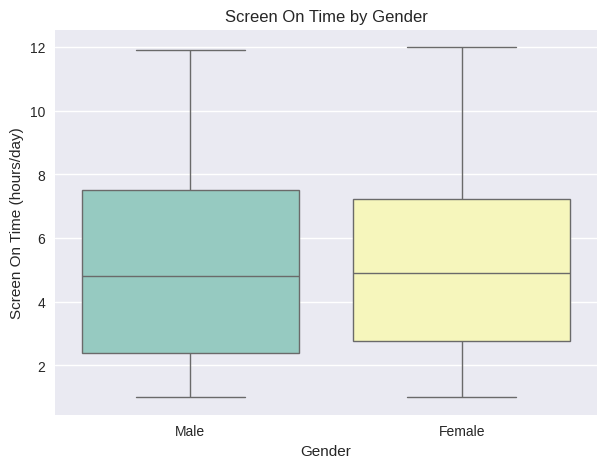

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x="Gender",
    y="Screen On Time (hours/day)",
    data=device_usage,
    palette="Set3"
)
plt.title("Screen On Time by Gender")
plt.xlabel("Gender")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

## B. DEVICE OS & BEHAVIOUR

###  Insight: Device Model Frequency
The dataset includes five major smartphone models with relatively even representation.  
This balanced distribution ensures that comparisons across device types are fair and not dominated by any single model.  
Devices include a mix of Android flagships (Samsung, OnePlus, Xiaomi, Pixel) and iPhone 12.


/tmp/ipython-input-1641415950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


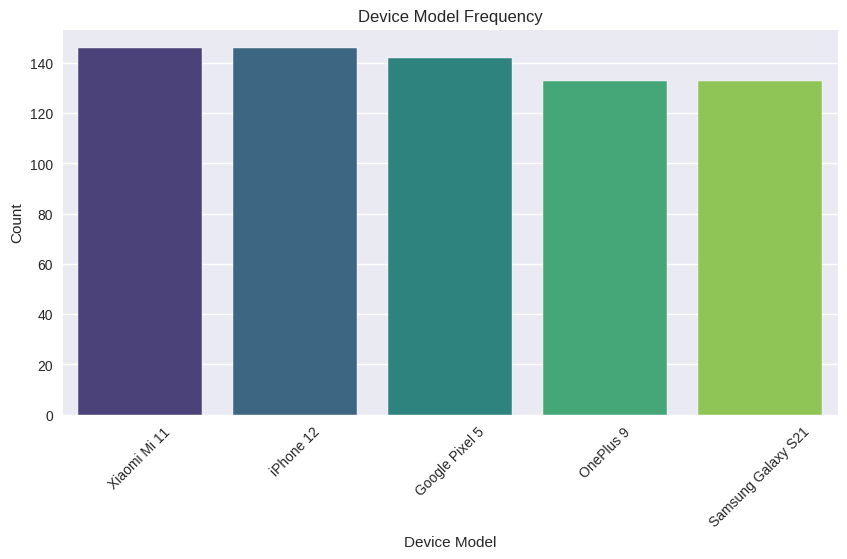

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(
    x="Device Model",
    data=device_usage,
    order=device_usage["Device Model"].value_counts().index,
    palette="viridis"
)
plt.title("Device Model Frequency")
plt.xlabel("Device Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Insight: Operating System Distribution
Android users make up a large majority of the dataset (~79%), while iOS users account for the remaining ~21%.  
This reflects real-world global smartphone market dynamics, where Android has a larger share.  
It also means behavioral patterns discovered in this dataset may lean toward Android-heavy usage habits.


/tmp/ipython-input-2739344254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Operating System", data=device_usage, palette="coolwarm")


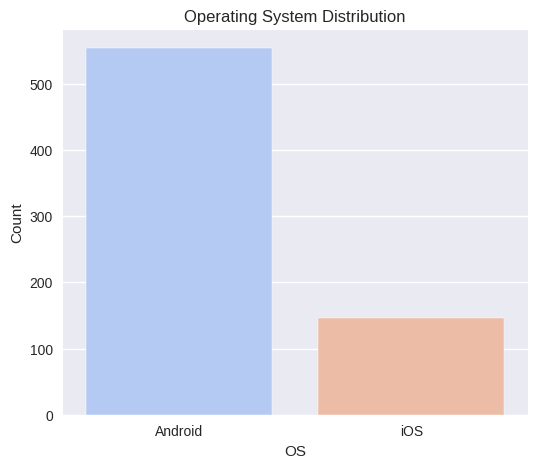

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="Operating System", data=device_usage, palette="coolwarm")
plt.title("Operating System Distribution")
plt.xlabel("OS")
plt.ylabel("Count")
plt.show()

### Insight: Screen-On Time Across OS
Android users display slightly higher screen-on time on average compared to iOS users.  
This may reflect differences in device ecosystems, app availability, or user habits.  
The distribution spread also suggests that Android users have more variability in screen engagement.


/tmp/ipython-input-467555201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


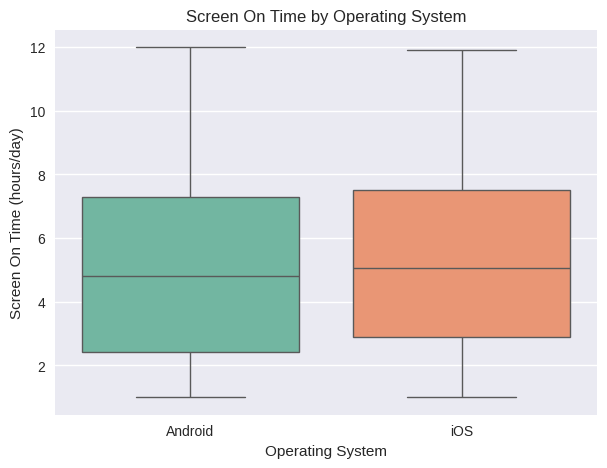

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x="Operating System",
    y="Screen On Time (hours/day)",
    data=device_usage,
    palette="Set2"
)
plt.title("Screen On Time by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

### Insight: Battery Drain by Device Model
Battery drain varies noticeably across device models.  
Some Android devices show higher daily mAh consumption, likely due to hardware efficiency or heavier usage patterns.  
This highlights that device type plays a role in energy consumption, independent of user behavior.


/tmp/ipython-input-1778998154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


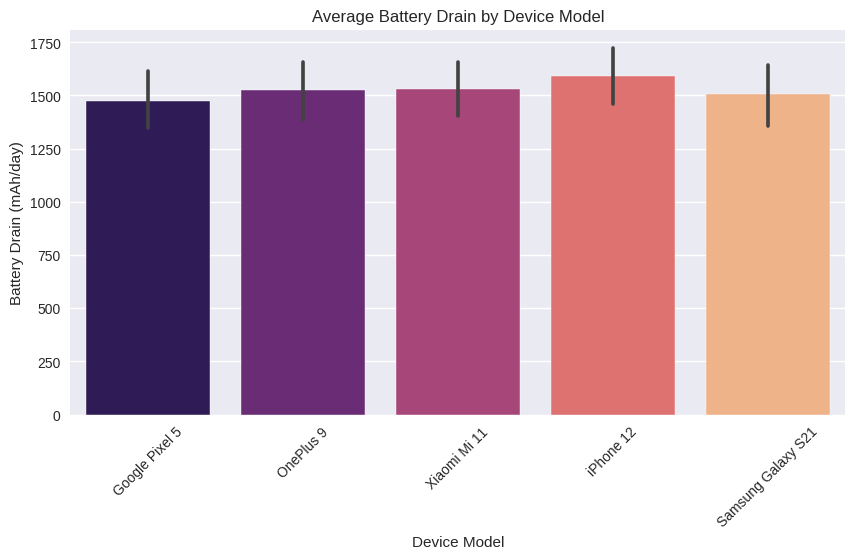

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="Device Model",
    y="Battery Drain (mAh/day)",
    data=device_usage,
    estimator=np.mean,
    palette="magma"
)
plt.title("Average Battery Drain by Device Model")
plt.xlabel("Device Model")
plt.ylabel("Battery Drain (mAh/day)")
plt.xticks(rotation=45)
plt.show()

### Insight: Data Usage by Device Model
Different device models exhibit distinct data consumption profiles.  
This may be due to hardware differences, user demographics tied to each device, or app usage behaviors.  
Overall, certain models appear to be associated with more data-heavy users, which could signal streaming/gaming-focused usage patterns.

/tmp/ipython-input-2584752643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


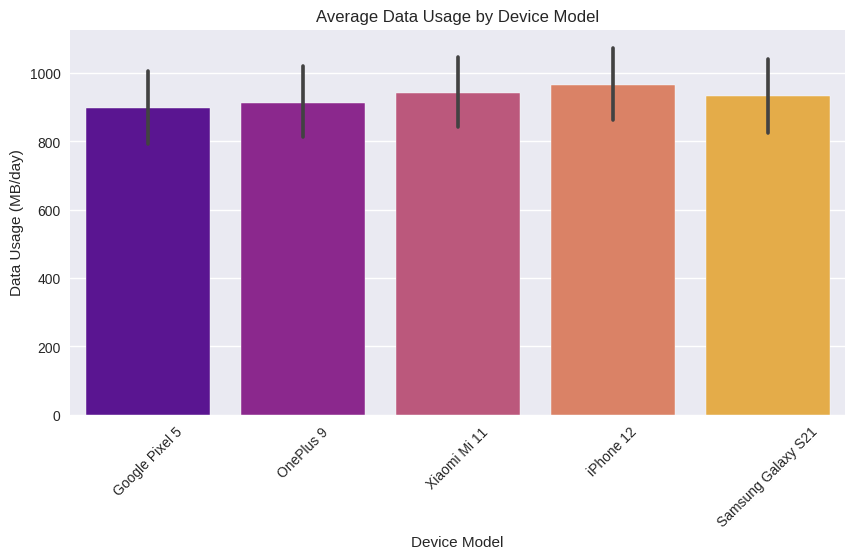

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="Device Model",
    y="Data Usage (MB/day)",
    data=device_usage,
    estimator=np.mean,
    palette="plasma"
)
plt.title("Average Data Usage by Device Model")
plt.xlabel("Device Model")
plt.ylabel("Data Usage (MB/day)")
plt.xticks(rotation=45)
plt.show()